# **Customer Churn Prediction using Machine Learning**

This project aims to predict whether a telecom customer is likely to churn using historical customer data and machine learning models.


### Problem Statement

Customer churn is a major challenge for telecom companies.  
The objective of this project is to analyze customer behavior and build a machine learning model to predict whether a customer will churn or not.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Data Collection and Loading

The dataset is loaded using pandas. Initial inspection is done to understand the structure, columns, and size of the data.


In [2]:
df=pd.read_csv('../telecom_customer_churn_CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Understanding

Basic exploration is performed to check:
- Data types
- Missing values
- Duplicate records
- Statistical summary of numerical features


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()

np.int64(0)

### Data Cleaning

Data cleaning is performed to handle missing values, incorrect data types, and unnecessary columns.


In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [11]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [12]:
df.drop('customerID',axis=1,inplace=True)

In [13]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
df['Churn'].unique()


array([0, 1])

In [17]:
df['Churn'].isnull().sum()

np.int64(0)

In [18]:

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [19]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
# Save cleaned dataset
df.to_csv("../telecom_customer_churn_CSV/cleaned_telco_churn.csv", index=False)

print("Cleaned CSV file saved successfully")


Cleaned CSV file saved successfully


### Exploratory Data Analysis (EDA)

EDA is performed to identify patterns, trends, and relationships between customer attributes and churn.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)


=> This chart shows the overall distribution of customers who have churned versus those who have been retained.


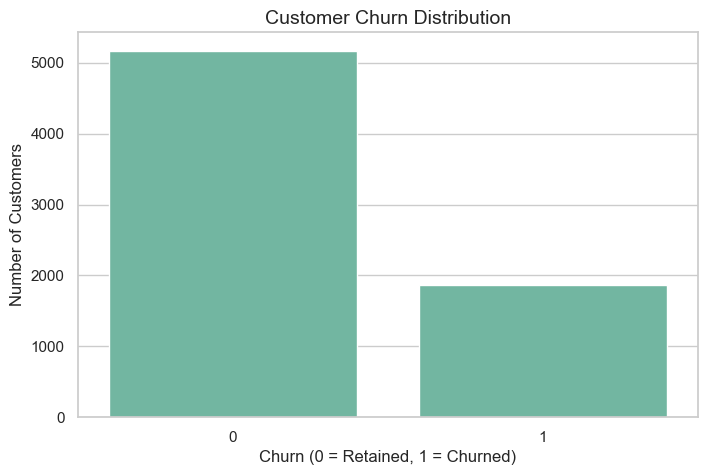

In [21]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.show()


=> This chart illustrates the churn behavior across different genders to analyze whether gender has an impact on customer churn.


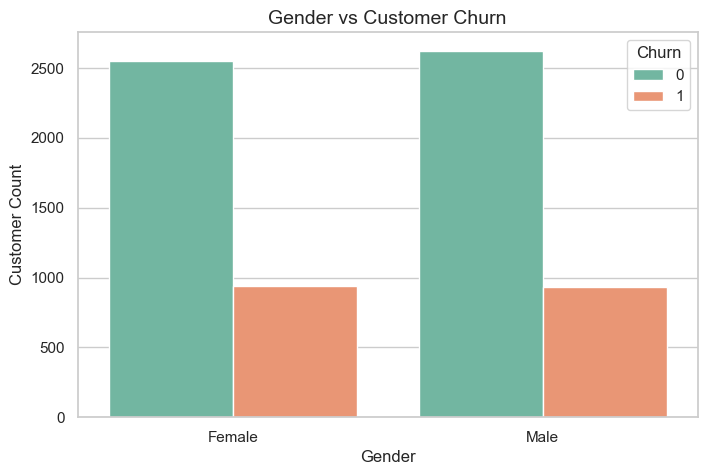

In [22]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender vs Customer Churn", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.show()


=> This visualization compares churn patterns between senior citizens and non-senior customers.


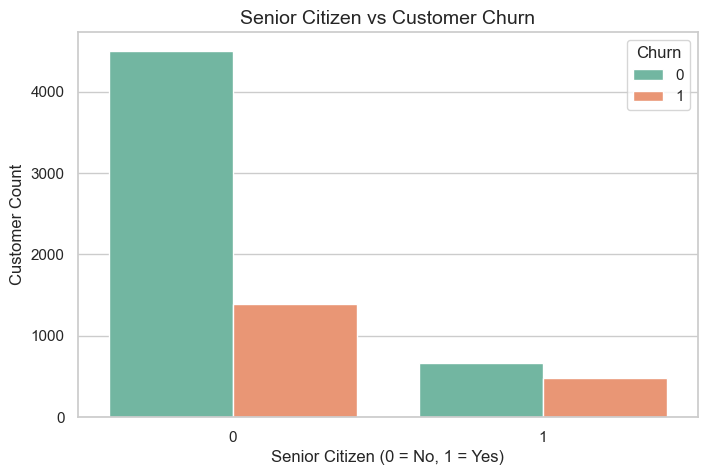

In [23]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizen vs Customer Churn", fontsize=14)
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.show()


=> This chart highlights the relationship between contract type and customer churn, showing that contract duration affects retention.


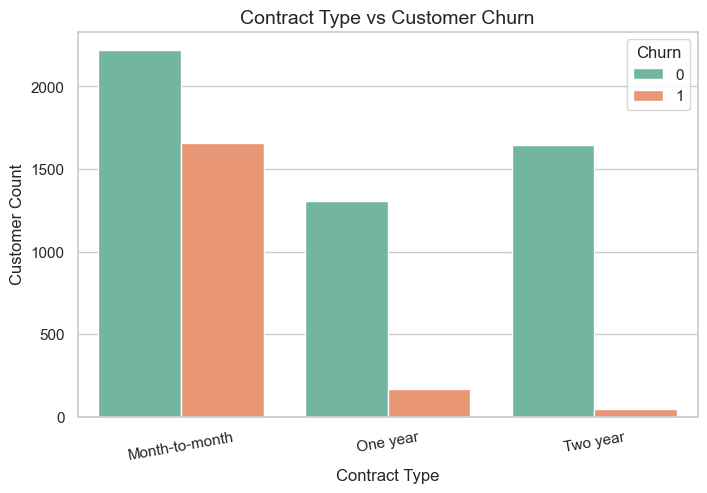

In [24]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Customer Churn", fontsize=14)
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=10)
plt.legend(title="Churn")
plt.show()


=> This visualization analyzes how different payment methods influence customer churn behavior.


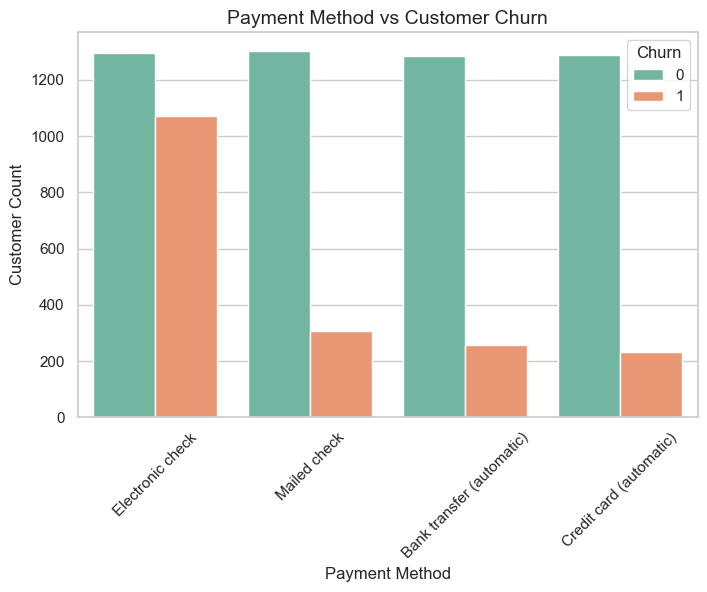

In [25]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Customer Churn", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()


=> This chart compares churn rates across different types of internet services offered to customers.


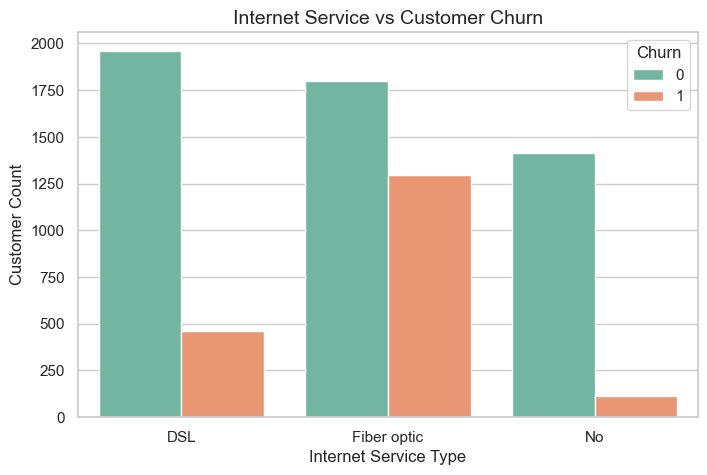

In [26]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Customer Churn", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.show()


=> This boxplot shows how customer tenure differs between churned and retained customers.


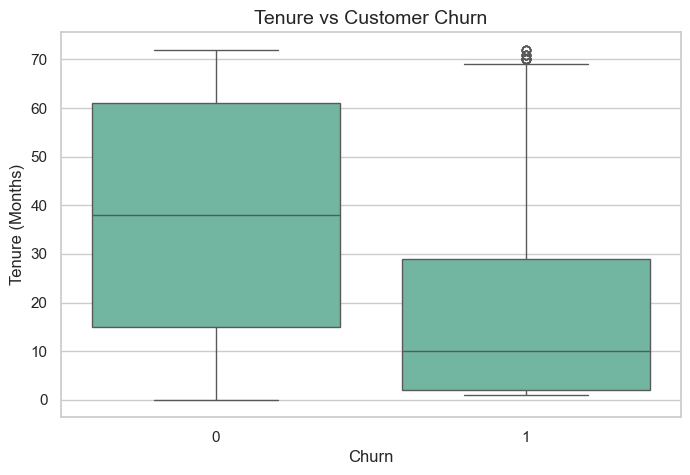

In [27]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Customer Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


=> This visualization demonstrates the relationship between monthly charges and the likelihood of customer churn.


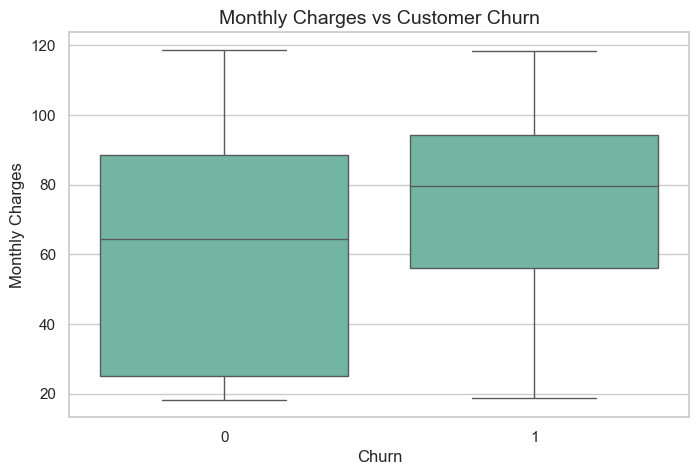

In [28]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Customer Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


=> This boxplot compares the distribution of total charges between churned and retained customers.


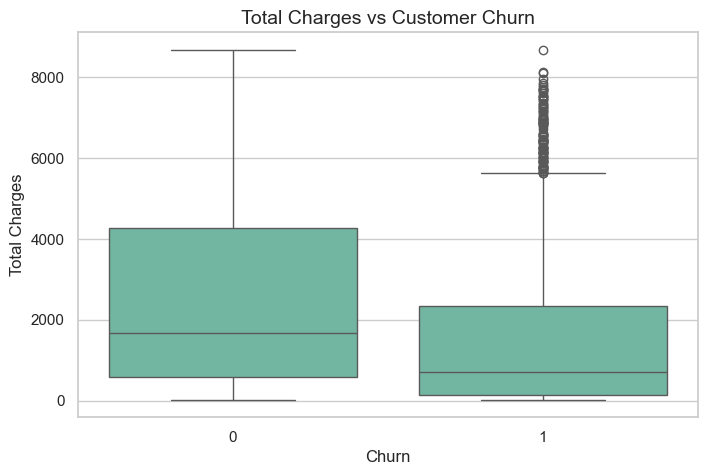

In [29]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Customer Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()


=> This heatmap displays the correlation between key numerical features and customer churn.


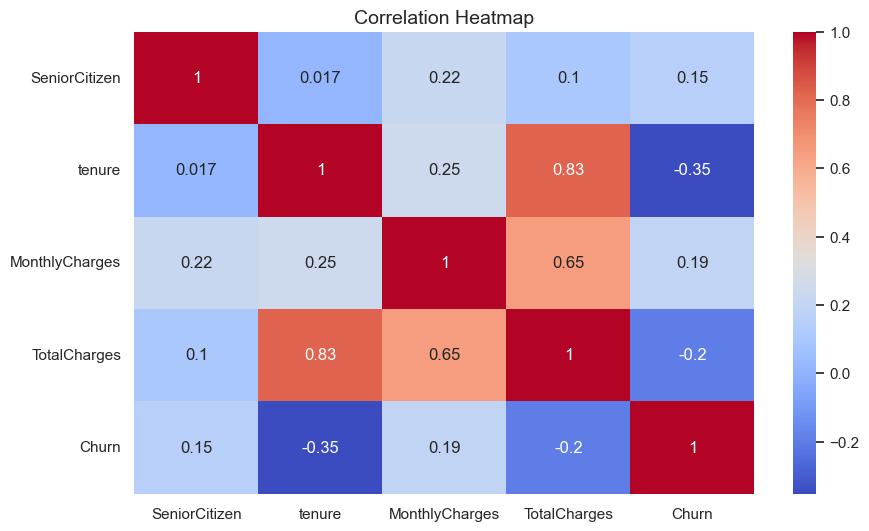

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


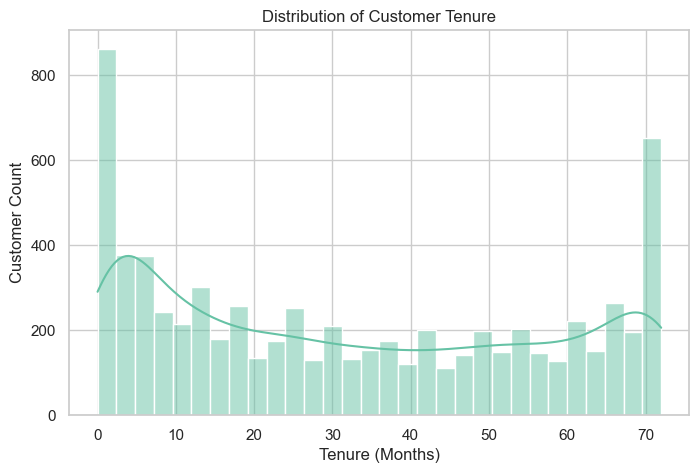

In [31]:
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.show()


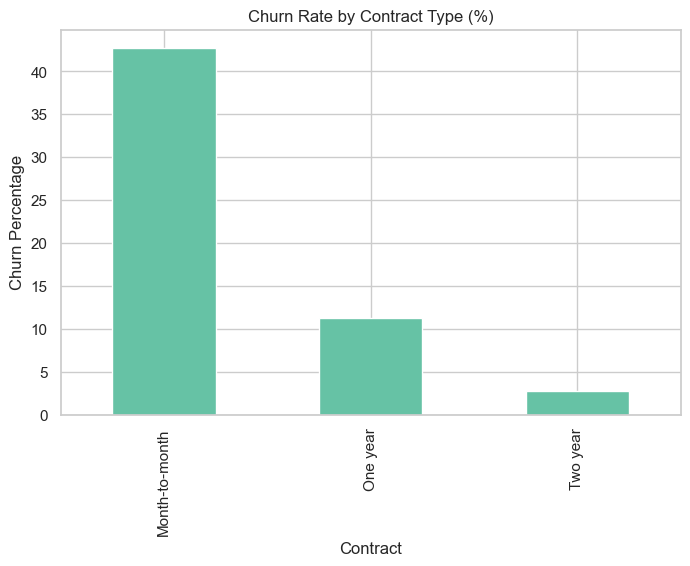

In [32]:
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn Percentage")
plt.show()


### Feature Engeniaring

Categorical variables are converted into numerical format using one-hot encoding to make them suitable for machine learning models.

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [34]:
x=df_encoded.drop('Churn', axis=1)
y=df_encoded['Churn']

### Train-Test Split

The dataset is split into training and testing sets to evaluate model performance on unseen data.


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Building

Two machine learning models are used:
- Decision Tree Classifier
- Random Forest Classifier


In [36]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

### Model Evaluation

Models are evaluated using accuracy, precision, recall, F1-score, and confusion matrix.


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9985800496982605
Testing Accuracy: 0.7097232079489

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.45      0.45      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

Confusion Matrix:
 [[831 205]
 [204 169]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(X_train, y_train)



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [39]:
y_test_pred_rf = rf.predict(X_test)
print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))


Random Forest Testing Accuracy: 0.7892122072391767
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest Confusion Matrix:
 [[941  95]
 [202 171]]


### Hyperparameter Tuning

GridSearchCV is used to optimize Random Forest parameters and improve model performance.


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_


In [41]:
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    class_weight='balanced'
)


### Gradient Boosting Classifier

Gradient Boosting is an ensemble learning technique that builds models sequentially, where each new model corrects the errors of the previous ones. It often provides better performance for classification problems like customer churn prediction.


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [43]:
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8090844570617459
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Gradient Boosting Confusion Matrix:
 [[937  99]
 [170 203]]


### Model Comparison

The performance of Decision Tree, Random Forest, and Gradient Boosting models is compared to identify the best model for customer churn prediction.


In [44]:
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ]
})

model_comparison


,Model,Accuracy
0,Decision Tree,0.709723
1,Random Forest,0.789212
2,Gradient Boosting,0.809084


### Final Model Evaluation (Tuned Random Forest)

The performance of the tuned Random Forest model is evaluated on the test dataset using accuracy, confusion matrix, and classification report.


In [45]:
y_pred_best = best_rf.predict(X_test)

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Tuned RF Accuracy: 0.8119233498935415
[[951  85]
 [180 193]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Feature Importance Analysis

This analysis identifies the most important features that influence customer churn prediction in the Random Forest model.


In [46]:
importances = best_rf.feature_importances_
features = X_train.columns

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
1,tenure,0.186422
3,TotalCharges,0.169315
2,MonthlyCharges,0.125614
10,InternetService_Fiber optic,0.064248
25,Contract_Two year,0.059654
28,PaymentMethod_Electronic check,0.051655
13,OnlineSecurity_Yes,0.037837
24,Contract_One year,0.031443
19,TechSupport_Yes,0.025360
26,PaperlessBilling_Yes,0.021289


In [47]:
import pickle

with open("churn_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

print("Model saved successfully as churn_model.pkl")


Model saved successfully as churn_model.pkl


pip install streamlit


### Business Insights

- Customers with shorter tenure are more likely to churn.
- Higher monthly and total charges increase churn probability.
- Month-to-month contracts show significantly higher churn compared to long-term contracts.
- Customers using fiber optic internet services have higher churn rates.
- Electronic check payment method is associated with higher churn.


### Conclusion

In this project, customer churn prediction was successfully performed using machine learning techniques.
After comparing Decision Tree and Random Forest models, the tuned Random Forest model provided better performance.
The model can help telecom companies identify high-risk customers and take proactive retention actions.
